# Introduction to Python  

### Pandas Plotting and Descriptive Statistics


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Obs: Seaborn changes some settings on matplotlib  An alternative is to import this way:  
#import seaborn.apionly as sns

Plotting with Pandas  
--

In [2]:
dfvote = pd.read_excel(os.path.join('../Data','votesurvey.xls'), 'votesurvey')
dfvote.head()

,Gender,Age,Salary before Stern,Expected salary,Candidate
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush


In [3]:
dfvote.sort_values(by=['Age','Expected salary'], ascending=[True, False])[0:10]

,Gender,Age,Salary before Stern,Expected salary,Candidate
6,Female,24,55000,100000,Bush
10,Female,24,59000,90000,Bush
16,Male,25,60000,150000,Gore
37,Male,25,125000,135000,Refuse to answer
14,Male,25,80000,100000,Bush
15,Male,25,45000,100000,Gore
39,Male,25,5000,100000,Refuse to answer
33,Male,25,40000,90000,Refuse to answer
23,Female,25,45000,85000,Gore
30,Female,25,49000,85000,Gore


In [4]:
for i in dfvote.index:
    dfvote.loc[i, 'Random'] = np.random.randint(10)
dfvote.Random = dfvote.Random.astype(int)
dfvote.head()

,Gender,Age,Salary before Stern,Expected salary,Candidate,Random
0,Male,27,60000,110000,Bush,7
1,Male,30,125000,125000,Bush,7
2,Male,27,50000,120000,Bush,2
3,Male,26,56000,100000,Bush,6
4,Male,27,82000,100000,Bush,3


### Histogram  

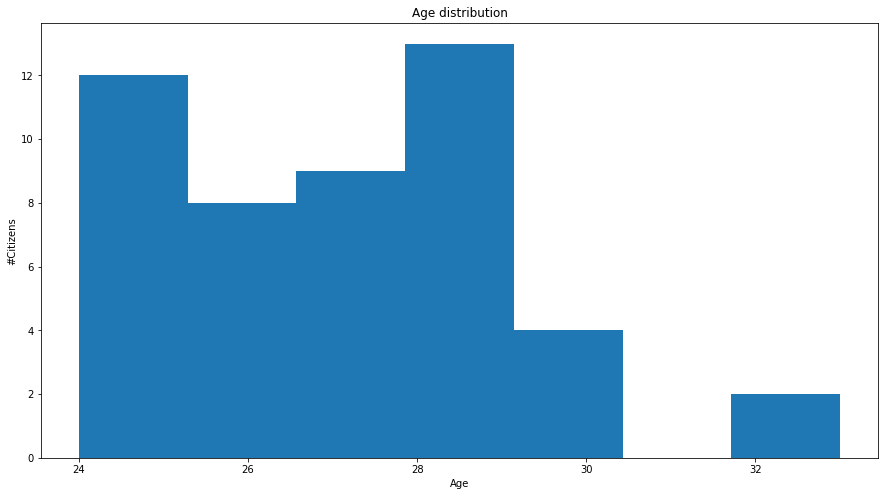

In [5]:
fig = plt.figure(figsize=(15,8))
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(dfvote['Age'],bins = 7) # Here you can play with number of bins Labels and Tit
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('#Citizens')
plt.show()

### Box Plot  

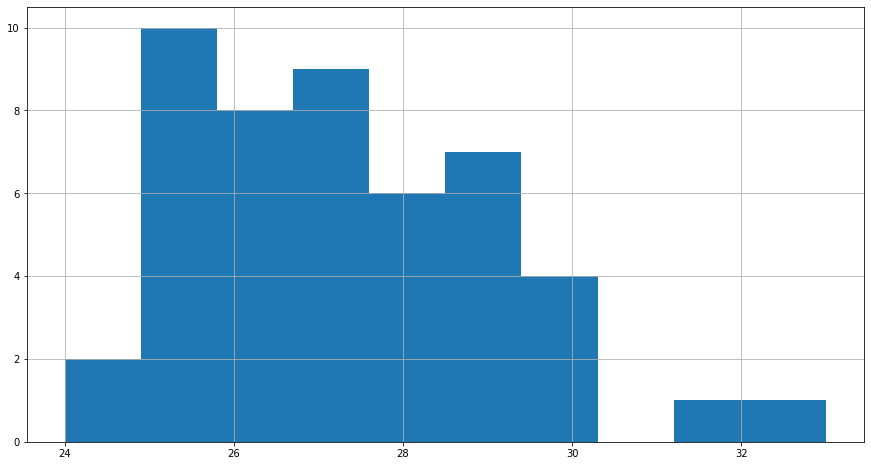

In [6]:
dfvote.Age.hist(figsize=(15,8));

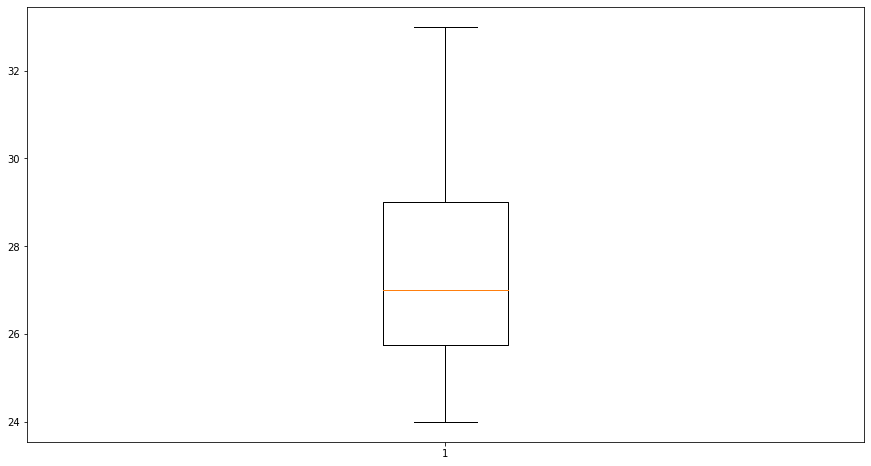

In [7]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.boxplot(dfvote['Age'])
plt.show()

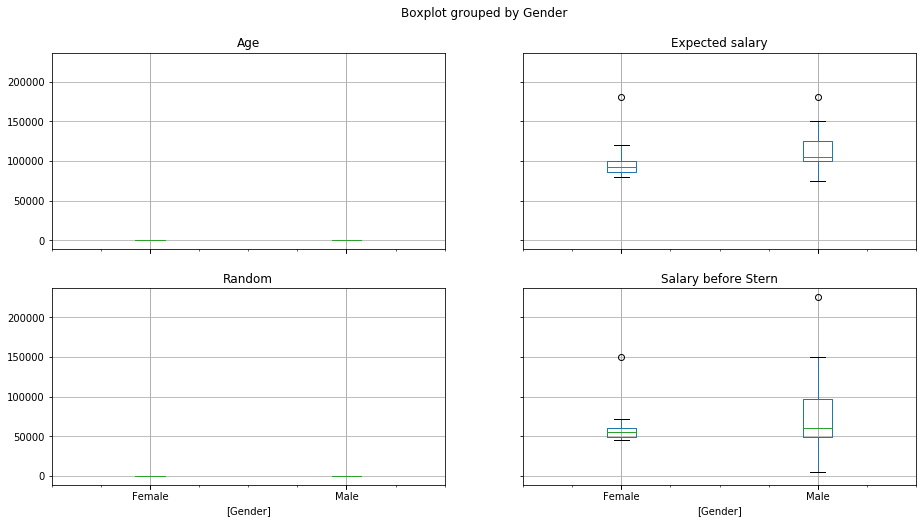

In [8]:
dfvote.boxplot(by='Gender', figsize=(15,8));

### Violin Plot (using Seaborn)  

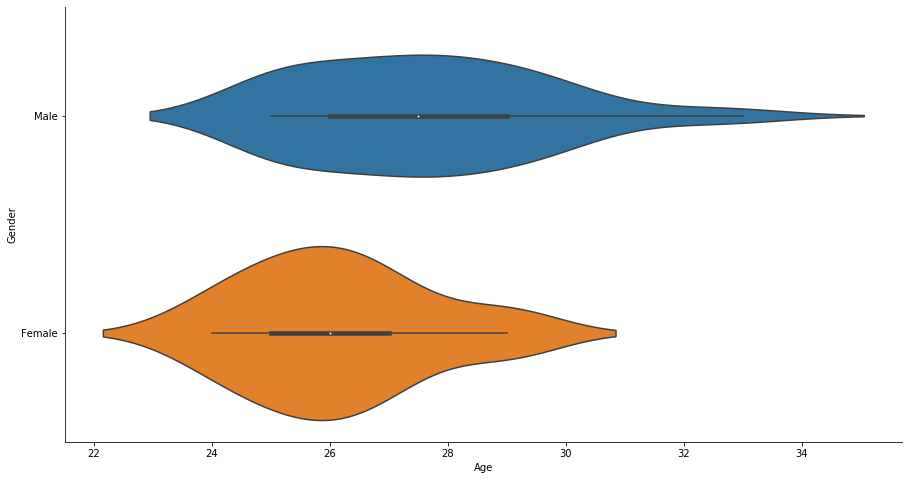

In [9]:
fig = plt.figure(figsize=(15,8))
sns.violinplot(dfvote['Age'], dfvote['Gender'])
sns.despine()

### Bar Chart  

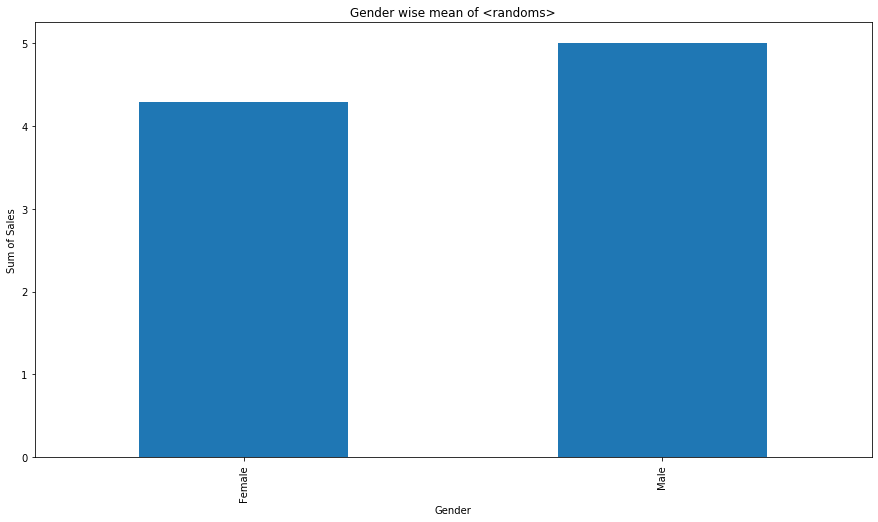

In [10]:
#var = df.groupby('Gender').Random.sum() #grouped sum of <randoms> at Gender level
var = dfvote.groupby('Gender').Random.mean() #grouped mean of <randoms> at Gender level
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Sum of Sales')
ax1.set_title("Gender wise mean of <randoms>") #sum or mean
var.plot(kind='bar');

### Line Chart  

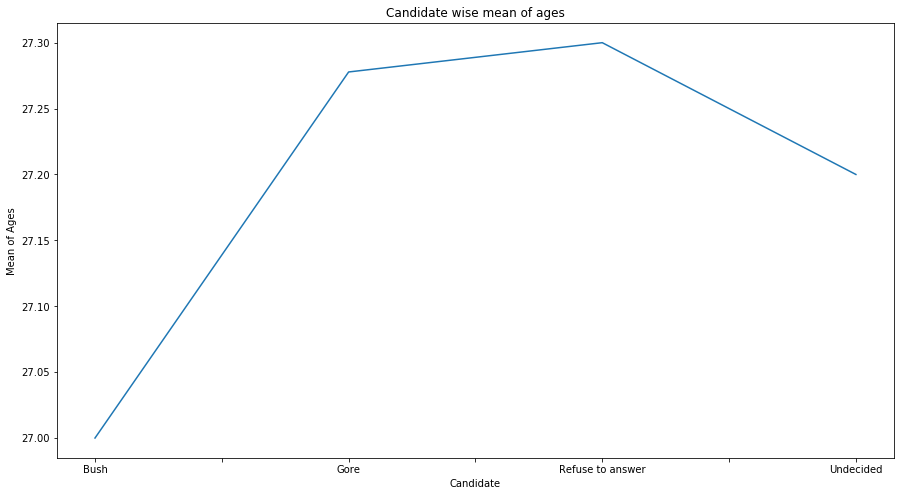

In [11]:
var = dfvote.groupby('Candidate').Age.mean()
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)
#ax1.set_xlabel('Candidate')
ax1.set_ylabel('Mean of Ages')
ax1.set_title("Candidate wise mean of ages")
var.plot(kind='line')

### Stacked Column Chart  

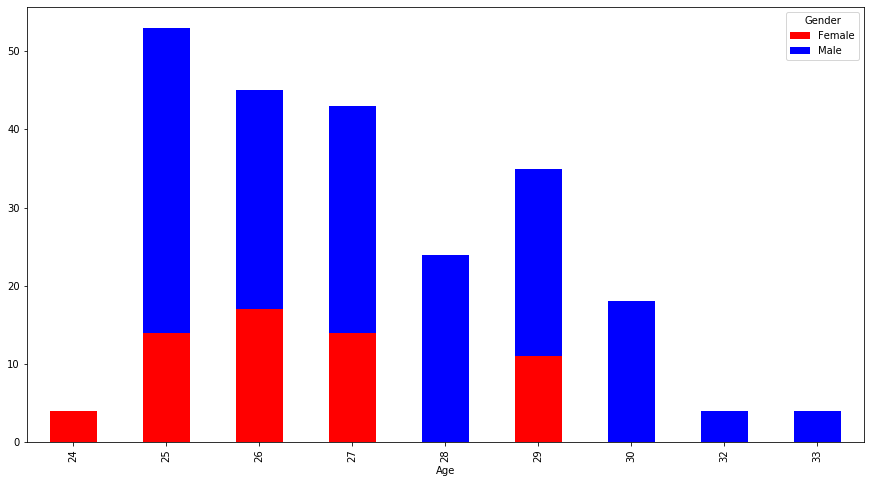

In [12]:
var = dfvote.groupby(['Age','Gender']).Random.sum()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False, figsize=(15,8))

### Scatter Plot  

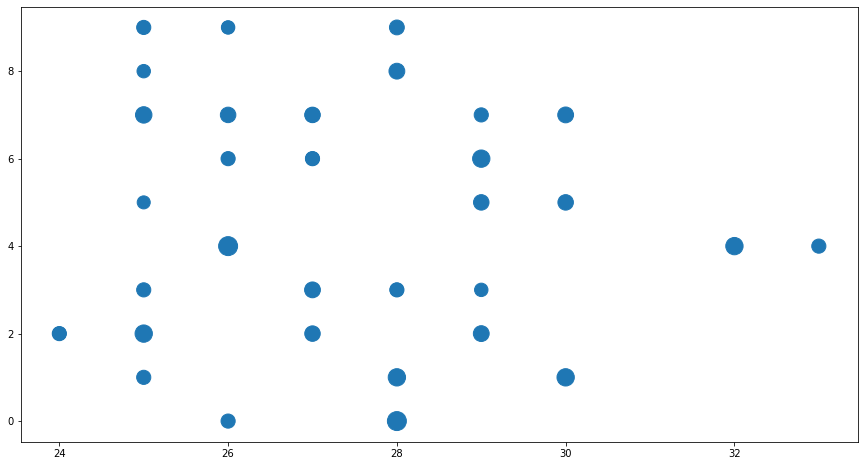

In [13]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(dfvote['Age'],dfvote['Random'],s=dfvote['Expected salary']/500) #You can also add more variables here to represent color and size.
plt.show()

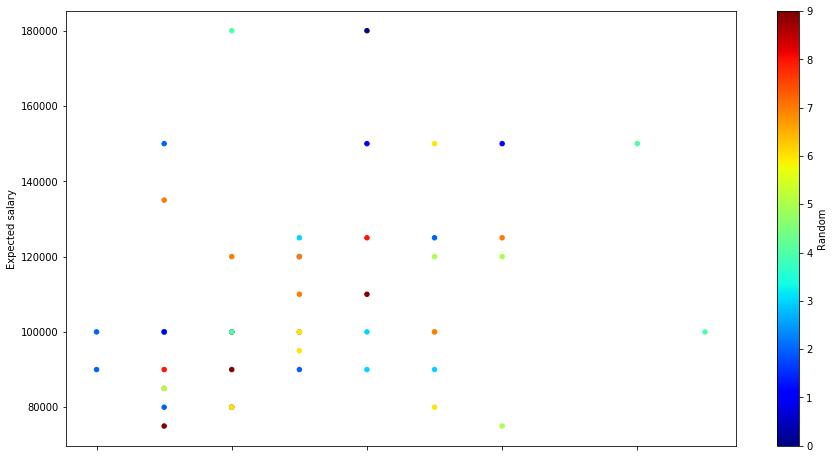

In [14]:
dfvote.plot.scatter(x='Age',y='Expected salary', c='Random', cmap='jet', figsize=(15,8));

### Bubble Plot  

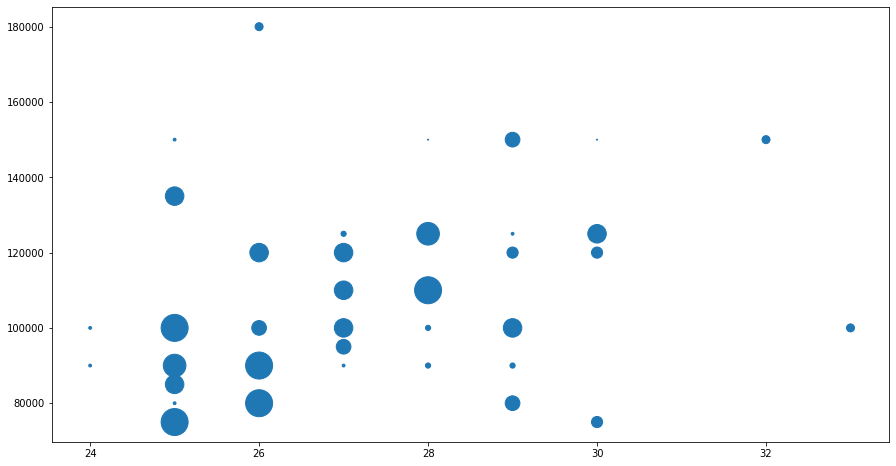

In [15]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
# Added third variable income as size of the bubble
ax.scatter(dfvote['Age'],dfvote['Expected salary'], s=dfvote['Random']**3)
plt.show()

### Pie chart  

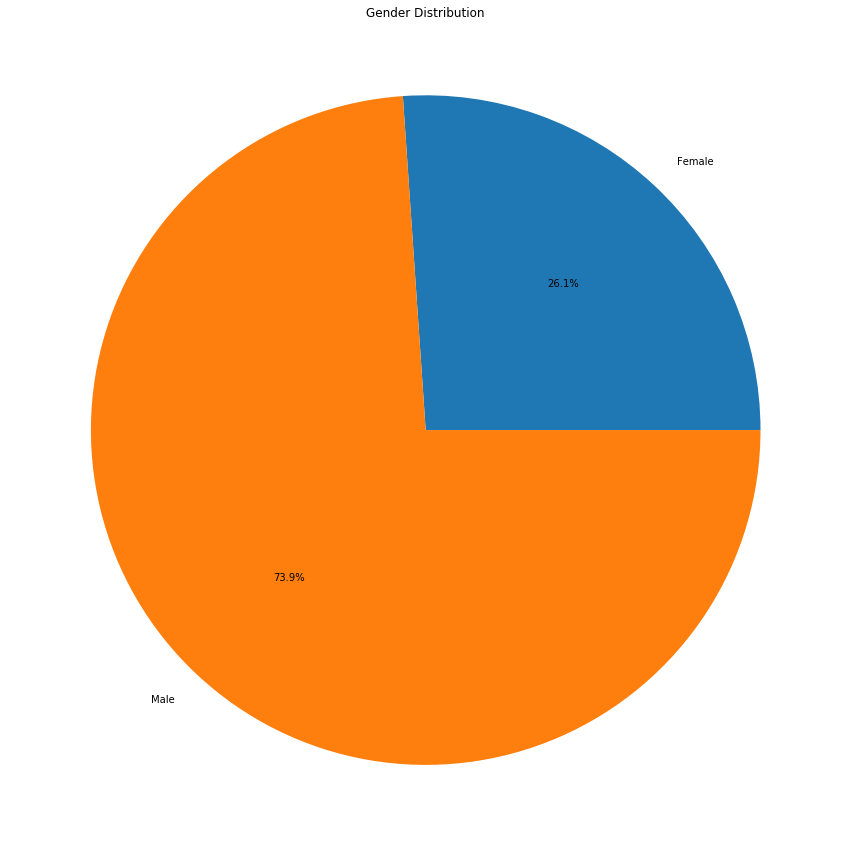

In [16]:
var=dfvote.groupby(['Gender']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['Random']
label_list = temp.index
#The pie chart is oval by default. To make it a circle use plt.axis("equal")
fig = plt.figure(figsize=(15,15))
plt.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("Gender Distribution")
plt.show()

### Heat Map  

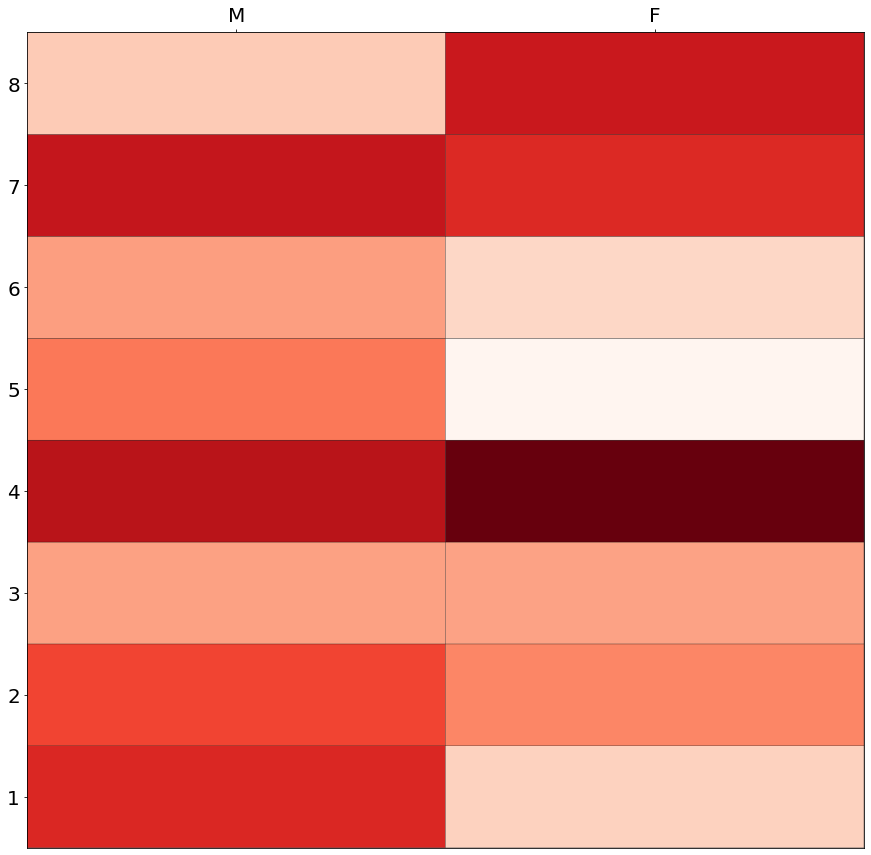

[[0.51354676 0.1555692 ]
 [0.44785948 0.31751491]
 [0.26246664 0.25931707]
 [0.58802601 0.7208429 ]
 [0.34818171 0.03678092]
 [0.26913083 0.14387574]
 [0.56566258 0.50889959]
 [0.17125706 0.55464978]]


In [17]:
#Generate a random number, you can refer your data values also
data = np.random.rand(8,2)
rows = list('12345678') #rows categories
columns = list('MF') #column categories

fig,ax=plt.subplots(figsize=(15,15))
#Advance color controls
ax.pcolor(data,cmap=plt.cm.Reds,edgecolors='k')
# Here we position the tick labels for x and y axis
ax.set_xticks(np.arange(0,2)+0.5)
ax.set_yticks(np.arange(0,8)+0.5)
ax.xaxis.tick_top()
ax.yaxis.tick_left()
#Values against each labels
ax.set_xticklabels(columns,minor=False,fontsize=20)
ax.set_yticklabels(rows,minor=False,fontsize=20)
plt.show()
print(data)

### A Case Study

In [18]:
df = pd.read_csv('../Data/MELBOURNE_HOUSE_PRICES_LESS.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [20]:
average = df['Price'].mean()
print(average)

med = df['Price'].median()
print(med)

997898.2414882415
830000.0


In [21]:
standard_deviation = df['Price'].std()
print(standard_deviation)

593498.9190372757


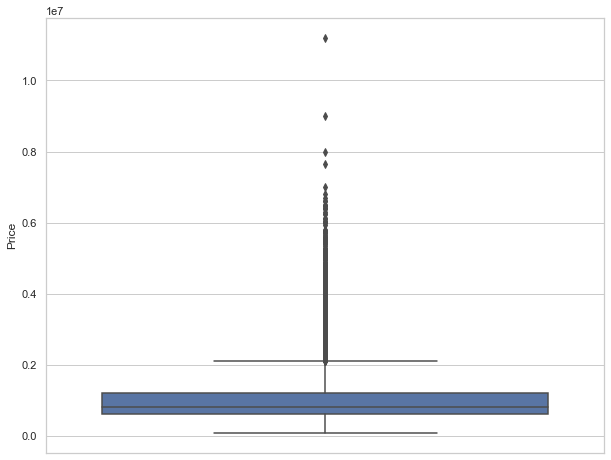

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Price', data=df, orient="v")

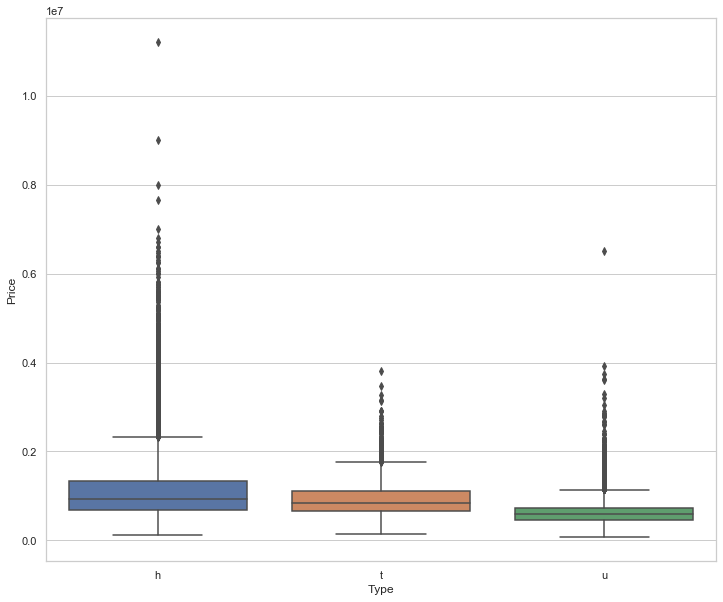

In [23]:
plt.figure(figsize=(12,10))
ax = sns.boxplot(x='Type', y='Price', data=df, orient="v")

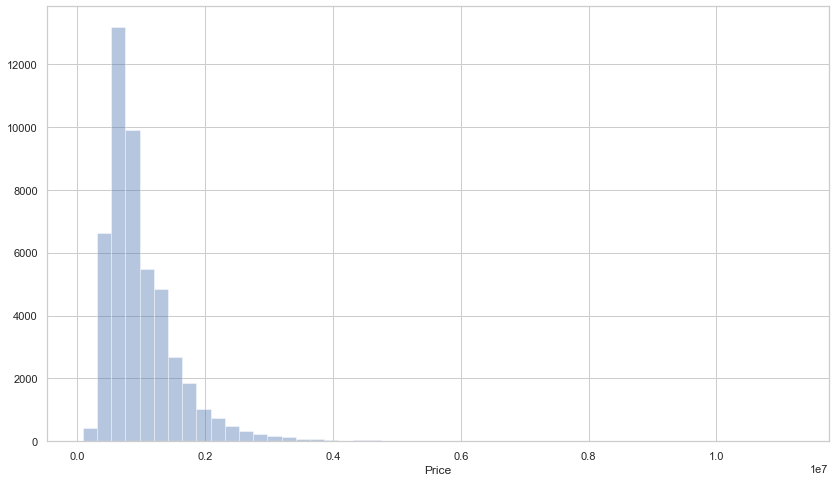

In [24]:
filter_data = df.dropna(subset=['Price'])
plt.figure(figsize=(14,8))
sns.distplot(filter_data['Price'], kde=False)

In [25]:
df['Type'].unique()

array(['h', 't', 'u'], dtype=object)

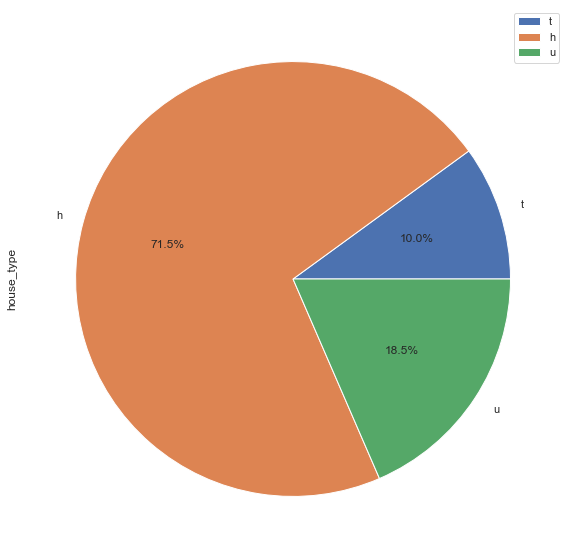

In [26]:
type_counts = df['Type'].value_counts()
df2 = pd.DataFrame({'house_type': type_counts}, index = ['t', 'h', 'u'])
df2.plot.pie(y='house_type', figsize=(10,10), autopct='%1.1f%%')

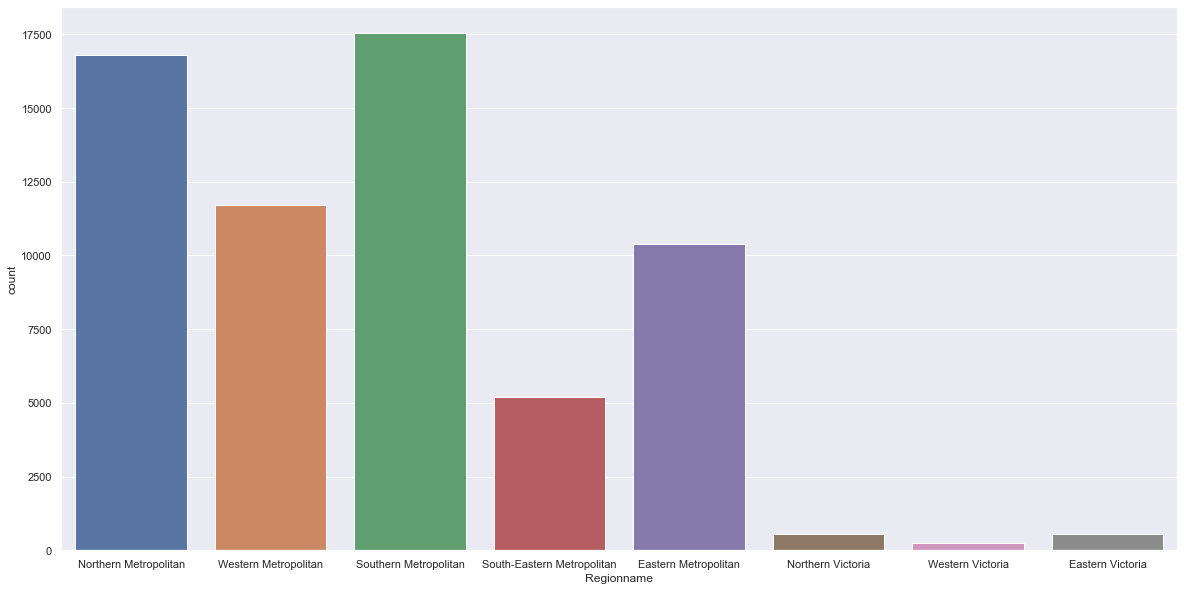

In [27]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Regionname', data=df)